<a href="https://colab.research.google.com/github/madhurima99/Rotten-Scripts/blob/WatermarkImages/Python/Watermark_Images/Watermark_Logo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np

#importing the main image
pImg = '/content/food.png' 
image = cv2.imread(pImg)
oH,oW = image.shape[:2]
image = np.dstack([image, np.ones((oH,oW), dtype="uint8") * 255])


#importing the logo image
pLogo = '/content/tastelogo.png'
lgo_img = cv2.imread(pLogo, cv2.IMREAD_UNCHANGED)


#Resizing the image
scl = 55
w = int(lgo_img.shape[1] * scl / 100)
h = int(lgo_img.shape[0] * scl / 100)
dim = (w,h)
lgo = cv2.resize(lgo_img, dim, interpolation = cv2.INTER_AREA)
lH,lW = lgo.shape[:2]


(B, G, R, A) = cv2.split(lgo)
B = cv2.bitwise_and(B, B, mask=A)
G = cv2.bitwise_and(G, G, mask=A)
R = cv2.bitwise_and(R, R, mask=A)
lgo = cv2.merge([B, G, R, A])

#Blending
ovr = np.zeros((oH,oW,4), dtype="uint8")
ovr[oH - lH - 0:oH - 0, oW - lW - 0:oW - 0] = lgo
final = image.copy()
final = cv2.addWeighted(ovr,1,final,1,0)


# ShoWing the result
cv2.imwrite('watermark.png', final)

True

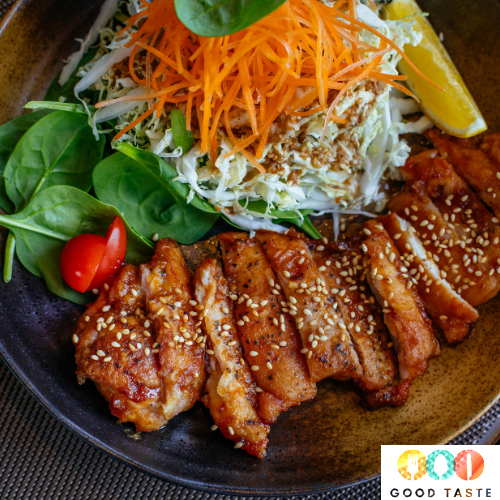

In [ ]:
from IPython.display import Image
Image('/content/watermark.png',width=500, height=400)

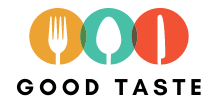

In [ ]:
from IPython.display import Image
Image('/content/tastelogo.png',width=300, height=100)

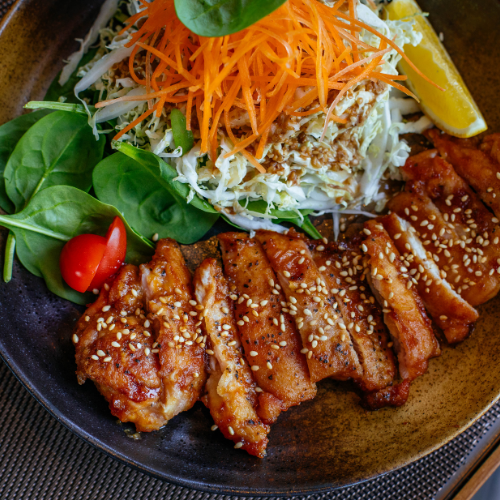

In [ ]:
from IPython.display import Image
Image('/content/food.png',width=500, height=400)